# Agrupación de datos

**Explicación Data Wrangling ->** https://www.notion.so/Data-Wrangling-a336f65b7533411aa28bca300307a963

**Explicación Dummy dataframes ->** 

**Librerías, Funciones:**
- *Pandas* ->
- *Numpy* -> 
- *Random* ->
- *Python* ->

**Índice:**

0. Preparación previa
1. Función **random** (randint, random)
2. Función **range**

    2.1. Rellenamos un array (**range**) con nºs aleatorios

    2.2. Método (**random**) que hace lo mismo
    
        
3. Función **shuffle**
4. Función **choice**
5. Función **seed**



Agrupar, filtrar y transformar los datasets
Agregación de datos -> combinarlos con algún criterio -> típico: usar una variable categórica para juntar toda la info en una categoría.
Para luego poder hacer un análisis categórico.

## *Preparación previa:*

Preparamos un dataset aleatorio

In [3]:
import pandas as pd
import numpy as np 

In [4]:
n = 500 #El tamaño de nuestro Dataset será de 500 filas

#Variables categóricas:

gender = ["Male","Female"] 
economic_class = ["Poor","Middle Class", "Rich"] 

#Variables numéricas:

height = np.round(170 + 15 * np.random.randn(n)) #Distrib normal, media 170cm, dispersión 15.
weight = np.round(65 + 25 * np.random.randn(n)) #Distrib normal, media 65kg, dispersión 25.
age = np.round(30 + 12 * np.random.randn(n)) #Distrib normal, media 30y, dispersión 12.
income = np.round(18000 + 3500 * np.random.randn(n)) #Distrib normal, media 180.00€, dispersión 3500€.

#Dataframes vacíos
gender_df = [] 
economic_class_df = [] 

#Apendizamos valores escogidos aleatoriamente:
for i in range (0, n):
    gender_df.append(np.random.choice(gender))
    economic_class_df.append(np.random.choice(economic_class))
    
#Rellenamos todo en un dataframe
df1 = pd.DataFrame( #Diccionario to Data Frame 
    {
        'Gender': gender_df,
        'Economic Status': economic_class_df,
        'Height': height,
        'Weight': weight,
        'Age': age,
        'Income': income,
    }
)

df1.head(5)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,167.0,31.0,12.0,17627.0
1,Female,Poor,184.0,77.0,47.0,18235.0
2,Male,Middle Class,193.0,92.0,25.0,17758.0
3,Male,Poor,180.0,43.0,19.0,26920.0
4,Female,Rich,154.0,95.0,41.0,17340.0


# 1. Agrupación categórica

Creamos grupos del dataset en base de una variable categórica [Gender]

In [11]:
double_group = df1.groupby(["Gender", "Economic Status"])
double_group.groups #Los nºs indican en qué fila hay un "Female" o "Male"

{('Female', 'Middle Class'): [9, 10, 24, 25, 27, 39, 52, 54, 62, 73, 91, 93, 112, 120, 129, 131, 138, 143, 144, 146, 150, 156, 160, 164, 169, 170, 172, 180, 189, 192, 202, 218, 223, 229, 230, 235, 237, 238, 241, 243, 249, 255, 259, 268, 270, 271, 276, 291, 298, 304, 320, 326, 336, 340, 345, 352, 354, 357, 362, 366, 368, 371, 380, 383, 391, 393, 398, 399, 403, 414, 417, 420, 430, 436, 442, 448, 451, 460, 467], ('Female', 'Poor'): [1, 7, 8, 14, 15, 20, 32, 47, 53, 55, 60, 61, 70, 77, 88, 90, 97, 102, 125, 128, 132, 137, 154, 161, 168, 174, 183, 187, 190, 193, 194, 196, 203, 206, 209, 211, 220, 221, 231, 233, 236, 242, 246, 247, 256, 267, 273, 274, 297, 299, 302, 309, 310, 316, 317, 321, 339, 341, 346, 351, 364, 369, 381, 386, 392, 411, 423, 426, 429, 437, 438, 440, 445, 449, 453, 459, 461, 469, 479, 481, 482, 489, 493, 494, 497], ('Female', 'Rich'): [4, 5, 6, 21, 22, 35, 40, 43, 44, 49, 50, 56, 64, 66, 67, 76, 99, 100, 103, 111, 113, 116, 119, 122, 123, 124, 126, 136, 139, 140, 148, 149,

In [12]:
#Bucle para mostrar todos los subgrupos
    
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status  Height  Weight   Age   Income
9    Female    Middle Class   154.0    56.0  20.0  18743.0
10   Female    Middle Class   191.0    98.0   9.0  18974.0
24   Female    Middle Class   165.0    65.0  19.0  22912.0
25   Female    Middle Class   172.0    39.0  60.0  15562.0
27   Female    Middle Class   174.0   106.0  37.0  10864.0
..      ...             ...     ...     ...   ...      ...
442  Female    Middle Class   175.0    57.0  22.0  21408.0
448  Female    Middle Class   189.0    10.0  -1.0  16177.0
451  Female    Middle Class   177.0    74.0   5.0  18892.0
460  Female    Middle Class   158.0   111.0  28.0  19963.0
467  Female    Middle Class   186.0     4.0  28.0  16411.0

[79 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status  Height  Weight   Age   Income
1    Female            Poor   184.0    77.0  47.0  18235.0
7    Female            Poor   177.0    -4.0  20.0  19725.0
8    Female            Poor   164.0    58.0  3

## 1.1. Estadísticos básicos sobre datos agrupados

In [20]:
double_group.sum()
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     170.316456  67.367089  29.316456  17743.367089
       Poor             167.788235  63.188235  30.423529  17384.329412
       Rich             170.412500  63.112500  28.687500  18554.837500
Male   Middle Class     169.365385  63.951923  30.625000  18035.432692
       Poor             171.804598  62.977011  30.114943  18181.781609
       Rich             169.107692  67.338462  29.984615  17009.846154

In [104]:
double_group.size()

Gender  Economic Status
Female  Middle Class       111
        Poor                86
        Rich                94
Male    Middle Class        78
        Poor                67
        Rich                64
dtype: int64

In [105]:
double_group.describe()

Height                                               \
                        count        mean        std    min     25%    50%   
Gender Economic Status                                                       
Female Middle Class     111.0  168.639640  15.008963  132.0  158.00  170.0   
       Poor              86.0  170.767442  16.282560  132.0  159.25  169.0   
       Rich              94.0  167.819149  14.309154  129.0  159.00  168.0   
Male   Middle Class      78.0  170.128205  14.434230  141.0  160.00  169.5   
       Poor              67.0  167.985075  14.499208  132.0  157.00  167.0   
       Rich              64.0  169.640625  13.708261  139.0  159.75  169.5   

                                      Weight             ...    Age        \
                           75%    max  count       mean  ...    75%   max   
Gender Economic Status                                   ...                
Female Middle Class     178.00  209.0  111.0  66.171171  ...  35.00  58.0   
       Poor             182.75  208.0   86.0  64.523256  ...  38.75  57.0   
       Rich             176.00  204.0   94.0  66.074468  ...  39.00  59.0   
Male   Middle Class     179.00  216.0   78.0  64.512821  ...  40.75  73.0   
       Poor             177.00  204.0   67.0  69.805970  ...  35.00  57.0   
       Rich             178.00  210.0   64.0  66.500000  ...  37.25  58.0   

                       Income                                                \
                        count          mean          std      min       25%   
Gender Economic Status                                                        
Female Middle Class     111.0  17777.324324  3432.237974   7161.0  15527.50   
       Poor              86.0  17883.511628  3494.164577   9725.0  15588.00   
       Rich              94.0  18077.095745  3771.228079   9287.0  15462.75   
Male   Middle Class      78.0  17562.166667  3118.378385  10412.0  15729.25   
       Poor              67.0  17653.507463  3161.313327  11404.0  14894.50   
       Rich              64.0  18342.703125  3480.472786   8932.0  16060.75   

                                                    
                            50%       75%      max  
Gender Economic Status                              
Female Middle Class     18060.0  19992.50  26516.0  
       Poor             17831.5  20215.00  27629.0  
       Rich             18345.0  20504.50  27086.0  
Male   Middle Class     17704.0  19411.25  25236.0  
       Poor             17440.0  19624.50  25247.0  
       Rich             17993.5  20721.25  29843.0  

[6 rows x 32 columns]

In [107]:
#Para aplicar los estadísticos básicos SÓLO a una columna

grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std      min       25%  \
Gender Economic Status                                                        
Female Middle Class     111.0  17777.324324  3432.237974   7161.0  15527.50   
       Poor              86.0  17883.511628  3494.164577   9725.0  15588.00   
       Rich              94.0  18077.095745  3771.228079   9287.0  15462.75   
Male   Middle Class      78.0  17562.166667  3118.378385  10412.0  15729.25   
       Poor              67.0  17653.507463  3161.313327  11404.0  14894.50   
       Rich              64.0  18342.703125  3480.472786   8932.0  16060.75   

                            50%       75%      max  
Gender Economic Status                              
Female Middle Class     18060.0  19992.50  26516.0  
       Poor             17831.5  20215.00  27629.0  
       Rich             18345.0  20504.50  27086.0  
Male   Middle Class     17704.0  19411.25  25236.0  
       Poor             17440.0  19624.50  25247.0  
       Rich             17993.5  20721.25  29843.0

In [21]:
#Para aplicar X estadísticos básicos a X columnas

double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                 
Female Middle Class     1401726.0  29.316456  13.602926
       Poor             1477668.0  30.423529  15.985182
       Rich             1484387.0  28.687500  14.833842
Male   Middle Class     1875685.0  30.625000  15.548270
       Poor             1581815.0  30.114943  14.607930
       Rich             1105640.0  29.984615  13.186313

In [22]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: (np.mean(h)/np.std(h)) #Para cada valor de h...
    }
)

Age     Height
Gender Economic Status                      
Female Middle Class     29.316456  12.600579
       Poor             30.423529  10.558780
       Rich             28.687500  11.560570
Male   Middle Class     30.625000  10.945627
       Poor             30.114943  11.829231
       Rich             29.984615  12.924290

In [23]:
#Para aplicar ciertos cálculos a todas las columnas

double_group.aggregate([np.sum, np.mean, np.std]) #A todas las columnas aplicables...

Height                         Weight             \
                            sum        mean        std     sum       mean   
Gender Economic Status                                                      
Female Middle Class     13455.0  170.316456  13.602926  5322.0  67.367089   
       Poor             14262.0  167.788235  15.985182  5371.0  63.188235   
       Rich             13633.0  170.412500  14.833842  5049.0  63.112500   
Male   Middle Class     17614.0  169.365385  15.548270  6651.0  63.951923   
       Poor             14947.0  171.804598  14.607930  5479.0  62.977011   
       Rich             10992.0  169.107692  13.186313  4377.0  67.338462   

                                      Age                           Income  \
                              std     sum       mean        std        sum   
Gender Economic Status                                                       
Female Middle Class     28.985928  2316.0  29.316456  12.814799  1401726.0   
       Poor             24.452819  2586.0  30.423529  13.642874  1477668.0   
       Rich             26.146614  2295.0  28.687500  10.714469  1484387.0   
Male   Middle Class     22.089570  3185.0  30.625000  12.292699  1875685.0   
       Poor             23.471396  2620.0  30.114943  12.551684  1581815.0   
       Rich             22.633822  1949.0  29.984615  11.347484  1105640.0   

                                                   
                                mean          std  
Gender Economic Status                             
Female Middle Class     17743.367089  3560.902188  
       Poor             17384.329412  3270.451761  
       Rich             18554.837500  3323.077190  
Male   Middle Class     18035.432692  3478.834485  
       Poor             18181.781609  3855.490429  
       Rich             17009.846154  3538.638643

In [24]:
# Para aplicar una función lambda a todas las columnas
    
double_group.aggregate([lambda x: (np.mean(x)/np.std(x))])

Height    Weight       Age    Income
                         <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                         
Female Middle Class     12.600579  2.338982  2.302321  5.014669
       Poor             10.558780  2.599424  2.243229  5.347121
       Rich             11.560570  2.429022  2.694347  5.618860
Male   Middle Class     10.945627  2.909138  2.503381  5.209438
       Poor             11.829231  2.698693  2.413184  4.743154
       Rich             12.924290  2.998279  2.662966  4.844298

# 2. Filtrado de datos


In [116]:
#Queremos elegir aquellos elementos cuya columna de edad de la agrupación de datos sea 2400

double_group["Age"].filter(lambda x: x.sum()>2400) #A continuación se muestran todos los elementos que se encuentran en un grupo que si lo sumas da más de 2400
#Devuelve elementos, sin distinguir su categoría

0      39.0
1      15.0
2      15.0
3      25.0
6      22.0
       ... 
492    31.0
494    73.0
496    34.0
497    31.0
498    28.0
Name: Age, Length: 369, dtype: float64

# 3. Transformación de variables

In [124]:
#Función transform, para hacer una transformación a los datos de una columna numérica

#Supongamos que queremos calcular la desviación estándar o la "tipificación" de los valores de una columna en concreto, le llamaremos la zscore.
#zscore es como llamamos a una función de transformación

zscore = lambda x : (x-x.mean())/x.std() #La x simboliza una de las columnas
z_group = double_group.transform(zscore)

#Si ahora las representaramos veríamos que tenemos una distrib normal, campana de Gauss, porque hemos TIPIFICADO los datos con esa operación que hemos hecho


In [125]:
import matplotlib.pyplot as plt

(array([  6.,  21.,  59.,  84., 120., 102.,  62.,  37.,   7.,   2.]),
 array([-2.82638828, -2.22646402, -1.62653977, -1.02661551, -0.42669126,
         0.17323299,  0.77315725,  1.3730815 ,  1.97300576,  2.57293001,
         3.17285426]),
 <BarContainer object of 10 artists>)

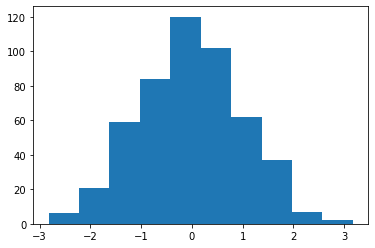

In [126]:
plt.hist(z_group["Age"]) #Ahora los datos están tipificados, centrados al medio, estandarizados

In [128]:
#Reemplazar NaNs con la función transform

fill_na_mean = lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,181.0,-1.0,39.0,10564.0
1,178.0,85.0,15.0,15976.0
2,155.0,79.0,15.0,20419.0
3,173.0,112.0,25.0,17277.0
4,152.0,74.0,33.0,19462.0
...,...,...,...,...
495,178.0,53.0,34.0,16577.0
496,166.0,47.0,34.0,19675.0
497,187.0,41.0,31.0,14971.0
498,160.0,56.0,28.0,18923.0


# Operaciones diversas muy útiles

In [129]:
double_group.head(1) #Nos devuelve el primer valor de cada grupo

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,181.0,-1.0,39.0,10564.0
1,Female,Middle Class,178.0,85.0,15.0,15976.0
3,Female,Poor,173.0,112.0,25.0,17277.0
4,Male,Poor,152.0,74.0,33.0,19462.0
11,Male,Middle Class,163.0,60.0,25.0,17773.0
16,Male,Rich,187.0,72.0,20.0,12893.0


In [131]:
#Seleccionar una determinada fila de cada uno de los objetos groupby #fila eneesíma -> función .nth

double_group.nth(32)

Height  Weight   Age   Income
Gender Economic Status                               
Female Middle Class      169.0    60.0   8.0  11935.0
       Poor              165.0    51.0  33.0  17630.0
       Rich              180.0    45.0  31.0  20961.0
Male   Middle Class      177.0    61.0  19.0  17686.0
       Poor              158.0    40.0  20.0  16790.0
       Rich              201.0   118.0  22.0  21514.0

In [132]:
#Ordenar las columnas de más a menos imp para ti

data_sorted = df1.sort_values(["Age", "Income"]) #Función sorted = ordenar
data_sorted

,Gender,Economic Status,Height,Weight,Age,Income
333,Female,Poor,177.0,34.0,-0.0,17159.0
205,Male,Poor,178.0,64.0,-0.0,19787.0
226,Male,Middle Class,203.0,39.0,2.0,16273.0
90,Male,Rich,180.0,38.0,2.0,17587.0
93,Female,Poor,184.0,16.0,2.0,17706.0
...,...,...,...,...,...,...
180,Female,Middle Class,165.0,56.0,58.0,16482.0
193,Male,Rich,171.0,76.0,58.0,19501.0
124,Female,Rich,168.0,46.0,59.0,13250.0
170,Male,Middle Class,188.0,90.0,63.0,19819.0


# Conjunto de entrenamiento y conjunto de testing

Test -> para validar la eficacia del modelo
Si no coinciden -> tienes problemas de "Over fitting", que el primer modelo se ha ajustado muy bien al primer dataset pero no vale para los demás.

75:25 o 80:20

Puedes cogerlos por orden, aleatoriamente...
Peligro cogerlo por orden, pq puede variar las cosas con el tiempo
Lo mejor es cogerlos aleatoriamente

A veces se obtiene un 3er dataset, el dataset de validación, no siempre, es para afinar los parámetros del modelo



En vez de utilizar la librería ya no existe:
from sklearn.model_selection import train_test_split

ahora es mejor utilizar:
from sklearn.model_selection import train_test_split

También cuidado si quieres representar un vector de variables booleanas, ya que al hacer un histograma obtendrás un error. Ahora debes añadir un casting con .astype(int) al final de la lista de python para poderlo representar.

Antes: plt.hist(check)
Después plt.hist(check.astype(int))

In [135]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename1 = "customer-churn-model/Customer Churn Model.txt" #Fichero a abrir
fullpath1 = mainpath + "/" + filename1 #Ruta completa

df2 = pd.read_csv(fullpath1)
df2.shape

(3333, 21)

### 1. División basada en un método aleatorio: utilizando la distribución normal

In [156]:
#Creamos un vector de la misma longitud que el dataset pero distribuido conforme a la normal

a = np.random.randn(len(df2))
a

array([-0.55817499, -0.45921838, -0.37927594, ..., -0.95064901,
       -0.00666627, -0.61614442])

(array([  3.,  12., 134., 356., 729., 955., 711., 326.,  89.,  18.]),
 array([-3.97276919, -3.24580869, -2.5188482 , -1.7918877 , -1.06492721,
        -0.33796671,  0.38899378,  1.11595428,  1.84291478,  2.56987527,
         3.29683577]),
 <BarContainer object of 10 artists>)

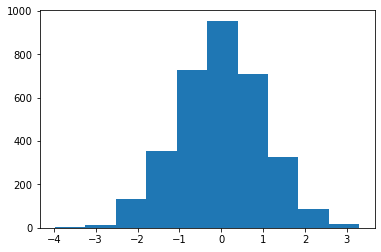

In [157]:
plt.hist(a)

In [158]:
check = (a < 0.8) #Condición que creamos, criterio 80:20
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 694.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2639.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

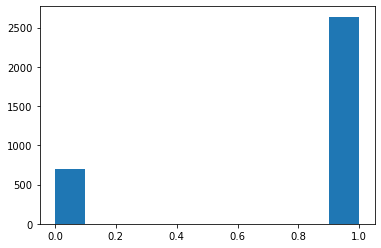

In [159]:
plt.hist(check.astype(int)) #Ahora vemos que el 80% de los valores caen en True, y el 20% en False

In [160]:
training = df2[check] #conjunto de entrenamiento "training" con los valores TRUE, que cumplen la condición 
testing = df2[~check] #conjunto de entrenamiento "testing" con los valores FALSE, que NO cumplen la condición 

In [161]:
len(training)

2639

In [162]:
len(testing)

694

### 2. Con la librería Sklearn

Librería de aprendizaje estadístico de Python
Tiene métodos ya implementados para dividir un dataset en un conjunto de entrenamiento y otro de testing.

Primera técnica: validación cruzada

In [168]:
#Imports

from sklearn.model_selection import train_test_split

In [169]:
train_df, test_df = train_test_split(df2, test_size=0.2)

In [172]:
len(train_df)

2666

In [171]:
len(test_df)

667

### 3er método: usando una función de shuffle

- 1ero mezclamos las filas
- 2do asignamos a test o train en función de la proporción de datos

In [174]:
df2.head() #Aquí tenemos todo el conjunto ordenado

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [175]:
import sklearn

In [186]:
df3 = sklearn.utils.shuffle(df2) #Ahora tenemos todo el conjunto des-ordenado

In [187]:
cut_id = int(0.75*len(df3))
train_data = df3[:cut_id]
test_data = df3[cut_id+1:]

In [188]:
len(train_data)

2499

In [189]:
len(test_data)

833